In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [4]:
#hyper parameters
my_dpi = 300

In [5]:
ted = pd.read_csv('ted_main.csv')

In [6]:
ted.head()
## name: delete before ':'
## film_date: into normal data
## published_date: into normal data
## tags, ratings, 은 list of dictionaries

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [8]:
str(ted['related_talks'].head(n=1))

"0    [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...\nName: related_talks, dtype: object"

In [9]:
df_num_views = ted.groupby(['event'])['views'].agg('sum').reset_index(name = 'sum').sort_values(['sum'], ascending = False)
df_num_views_top15 = df_num_views.head(n=15)
print(df_num_views_top15)

              event        sum
63          TED2013  177307937
64          TED2014  174121423
100  TEDGlobal 2013  170554736
65          TED2015  150826305
56          TED2006  147345533
59          TED2009  145656385
99   TEDGlobal 2012  145070549
62          TED2012  144497608
66          TED2016  139571905
61          TED2011  137750504
60          TED2010  122268845
98   TEDGlobal 2011  116807745
58          TED2008  116202871
96   TEDGlobal 2009  109136352
57          TED2007  102756885


C:\Users\study1\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


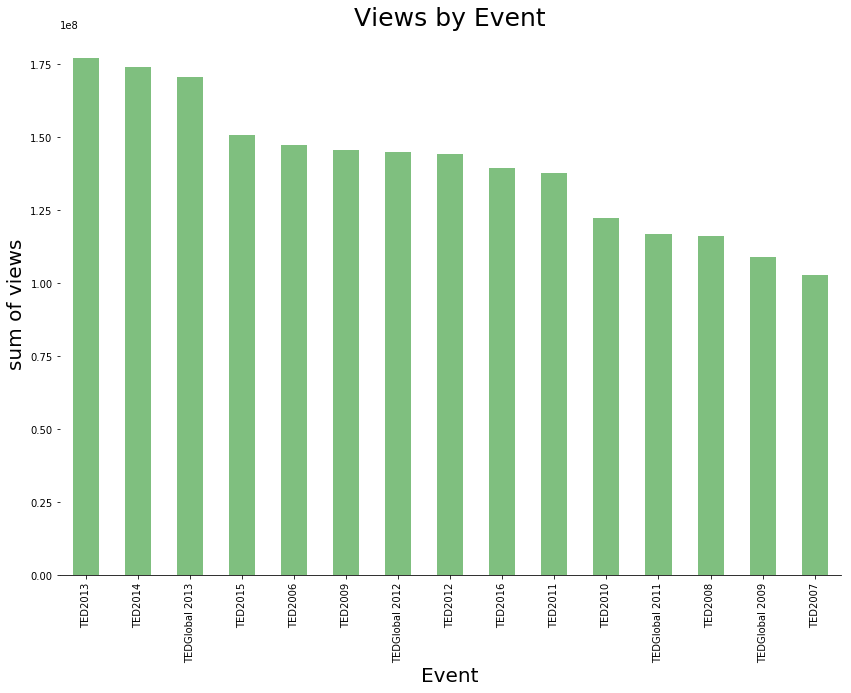

In [10]:
#event = df_num_views_top15.event
#summ = df_num_views_top15.sum

fig, ax = plt.subplots(figsize = (14, 10))

df_num_views_top15.plot.bar(ax = ax, x='event', alpha = 0.5, color='g')

ax.set_ylabel('sum of views', fontsize=20)
ax.set_xlabel('Event', fontsize=20)
ax.set_title('Views by Event', fontsize=25)

#plt.axhline(y=range(0, 200000000, 25000000), linestyle='--', color='g', alpha = 0.5)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

fig.patch.set_facecolor('white')
ax.set_axis_bgcolor('white')
ax.legend_.remove()

In [11]:
## convert unix timestamp data into datetime

ted['filmdate'] = pd.to_datetime(ted['film_date'], unit='s')
ted['publisheddate'] = pd.to_datetime(ted['published_date'], unit = 's')

#ted['filmdate'] = ted['filmdate'].astype(str).str[:-9]
#ted['publisheddate'] = ted['publisheddate'].astype(str).str[:-9]

ted[['filmdate', 'publisheddate']].head()

,filmdate,publisheddate
0,2006-02-25,2006-06-27 00:11:00
1,2006-02-25,2006-06-27 00:11:00
2,2006-02-24,2006-06-27 00:11:00
3,2006-02-26,2006-06-27 00:11:00
4,2006-02-22,2006-06-27 20:38:00


In [12]:
ted['diffdays'] = ted['publisheddate'] - ted['filmdate']
ted['diffdays'].head()

0   122 days 00:11:00
1   122 days 00:11:00
2   123 days 00:11:00
3   121 days 00:11:00
4   125 days 20:38:00
Name: diffdays, dtype: timedelta64[ns]

In [13]:
## published date into year

ted['year'] = ted['publisheddate'].astype(str).str[:4]
ted.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: year, dtype: object

In [14]:
## group by speaker, sum of views and count
#df_num_views = ted.groupby(['event'])['views'].agg('sum').reset_index(name = 'sum').sort_values(['sum'], ascending = False)

#top_speakers = ted.groupby(['main_speaker']).agg({'main_speaker': 'count', 'views':'sum'}).reset_index()

top_speakers = ted.groupby(['main_speaker'])['views'].agg(['sum', 'count']).reset_index()\
.rename(columns={'sum':'views', 'count':'talks'}).sort_values(['views'], ascending=False)

top_speakers = top_speakers.head(n=10)
top_speakers = top_speakers.reset_index(drop = True)
top_speakers

,main_speaker,views,talks
0,Ken Robinson,63006281,4
1,Amy Cuddy,43155405,1
2,Simon Sinek,41113370,2
3,Brené Brown,39157044,2
4,Julian Treasure,30927659,5
5,Hans Rosling,27567127,9
6,James Veitch,26187805,2
7,Mary Roach,22270883,1
8,Dan Gilbert,21796454,3
9,Jill Bolte Taylor,21190883,1


C:\Users\study1\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


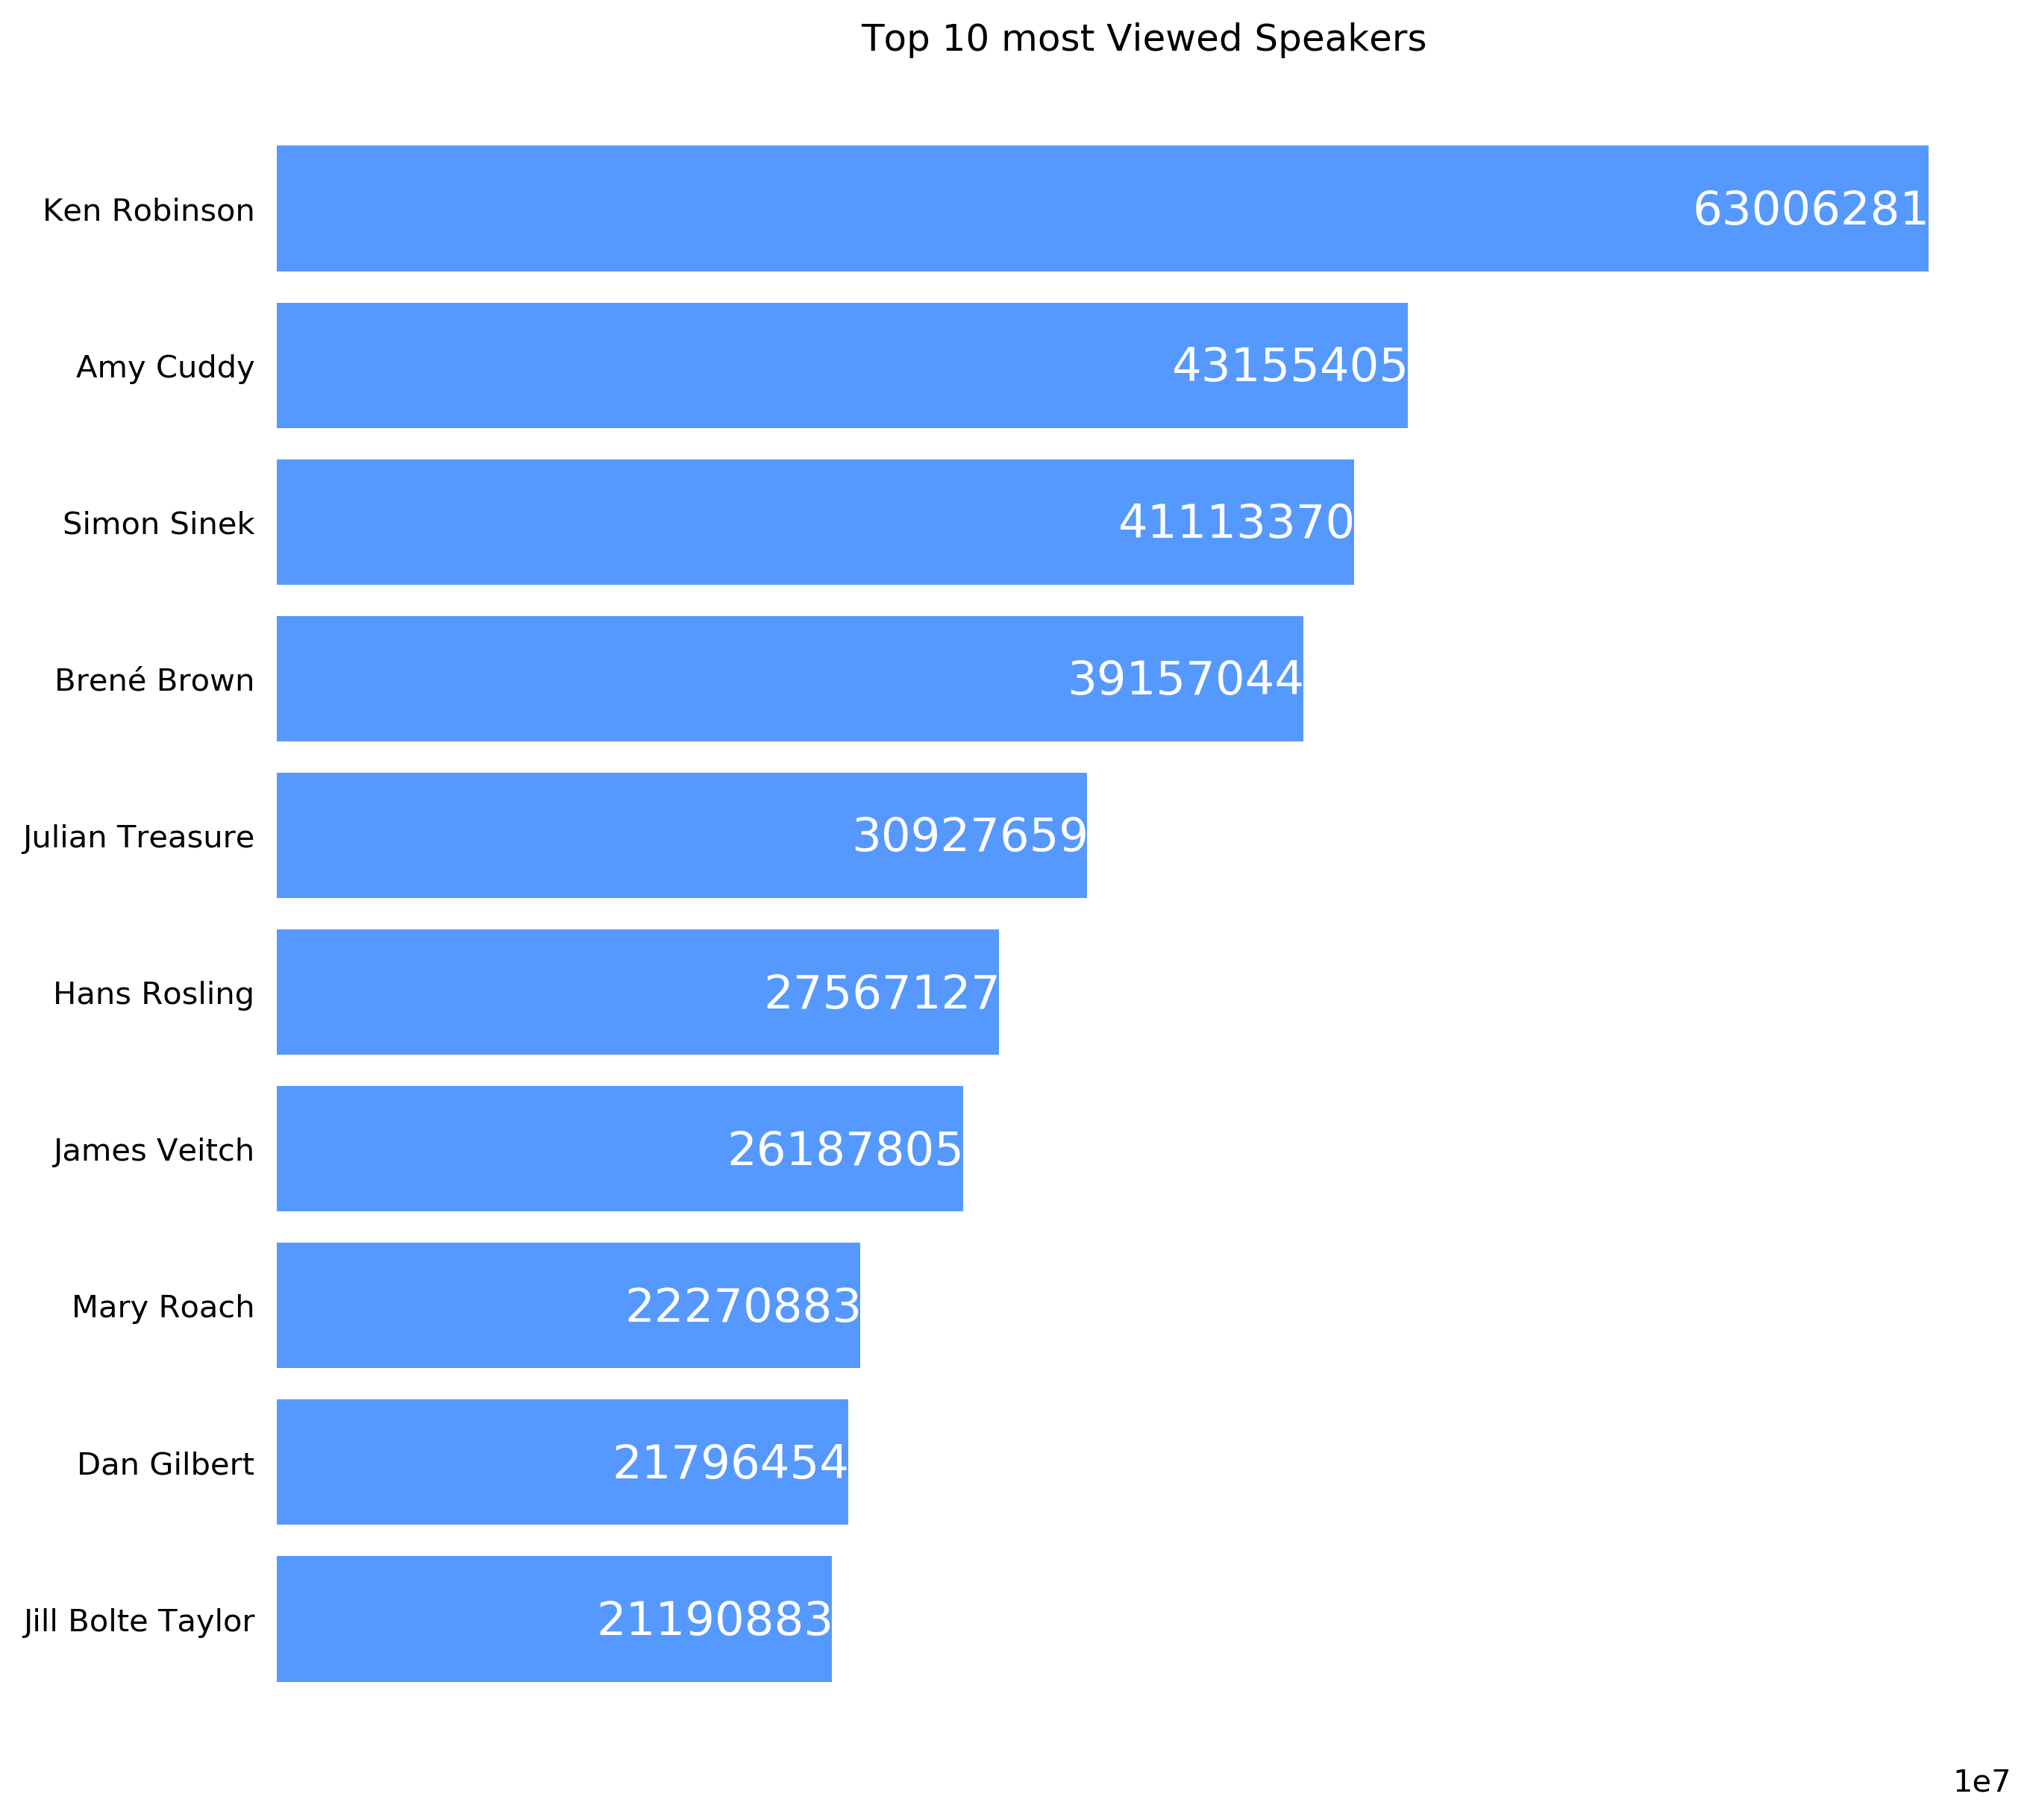

In [42]:
## 2006~2017 top10 most viewed speakers

### visualization

plt.figure(figsize=(10, 10),dpi=my_dpi)
ax = plt.subplot(111) 

speakers = top_speakers['main_speaker']
num_view = top_speakers['views']
y_pos = np.arange(len(speakers))

####
ax.barh(y_pos, num_view, align='center', color = '#5599ff', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(speakers)
ax.set_title('Top 10 most Viewed Speakers')

## show plot
ax.invert_yaxis()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")

fig.patch.set_facecolor('white')
ax.set_axis_bgcolor('white')
#######

rects = ax.patches
labels = top_speakers.views.tolist()

for i in range(10):
    ax.text(num_view[i]-9000000, i+0.1, num_view[i], fontsize = 15, color='white')
            
#format(num_view[i], ','))

#[format(x, ',') for x in range(0, 65000000)])

plt.savefig('10speakers.png')



In [16]:
speakers

0         Ken Robinson
1            Amy Cuddy
2          Simon Sinek
3          Brené Brown
4      Julian Treasure
5         Hans Rosling
6         James Veitch
7           Mary Roach
8          Dan Gilbert
9    Jill Bolte Taylor
Name: main_speaker, dtype: object

In [17]:
## group by year and main_speaker. agg by sum of views

agg_speakers = ted.groupby(['main_speaker', 'year'])['views'].agg('sum').reset_index(name = 'views')

agg_speakers = agg_speakers[agg_speakers['main_speaker'].isin(speakers)]\
.sort_values(['main_speaker', 'year'], ascending = True)\
.reset_index(drop = True)

## cumulative sum column
agg_speakers1 = agg_speakers.groupby(['main_speaker'])['views'].cumsum()
## into cumulative dataset
agg_speakers['cumviews'] = agg_speakers1
agg_speakers

## year: the year they published a talk. 
## views: views of their talks each year.


,main_speaker,year,views,cumviews
0,Amy Cuddy,2012,43155405,43155405
1,Brené Brown,2010,31168150,31168150
2,Brené Brown,2012,7988894,39157044
3,Dan Gilbert,2006,14689301,14689301
4,Dan Gilbert,2008,3707266,18396567
5,Dan Gilbert,2014,3399887,21796454
6,Hans Rosling,2006,12005869,12005869
7,Hans Rosling,2007,3243784,15249653
8,Hans Rosling,2009,4113921,19363574
9,Hans Rosling,2010,3673157,23036731


In [18]:
## make the above data frame into pivot_table

#speakers = speakers.pivot(index = ['year'], columns=['main_speaker'], values = ['cumviews']).fillna(0)

speakers_year = pd.pivot_table(agg_speakers, values = 'cumviews', index=['year'], columns = 'main_speaker')\
.reset_index().fillna(0)

speakers_year

## 이후의 0 은 숫자 채워 넣기

main_speaker,year,Amy Cuddy,Brené Brown,Dan Gilbert,Hans Rosling,James Veitch,Jill Bolte Taylor,Julian Treasure,Ken Robinson,Mary Roach,Simon Sinek
0,2006,0.0,0.0,14689301.0,12005869.0,0.0,0.0,0.0,47227110.0,0.0,0.0
1,2007,0.0,0.0,0.0,15249653.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,0.0,0.0,18396567.0,0.0,0.0,21190883.0,0.0,0.0,0.0,0.0
3,2009,0.0,0.0,0.0,19363574.0,0.0,0.0,1557795.0,0.0,22270883.0,0.0
4,2010,0.0,31168150.0,0.0,23036731.0,0.0,0.0,2705404.0,56348423.0,0.0,34309432.0
5,2011,0.0,0.0,0.0,25428708.0,0.0,0.0,8107632.0,0.0,0.0,0.0
6,2012,43155405.0,39157044.0,0.0,27567127.0,0.0,0.0,9333027.0,0.0,0.0,0.0
7,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63006281.0,0.0,0.0
8,2014,0.0,0.0,21796454.0,0.0,0.0,0.0,30927659.0,0.0,0.0,41113370.0
9,2016,0.0,0.0,0.0,0.0,26187805.0,0.0,0.0,0.0,0.0,0.0


In [19]:
## export to excel file
#speakers_year.to_csv("speakers_year.csv")

In [20]:
## after manipulation, read file.
speakers_year = pd.read_csv("speakers_year.csv")
speakers_year

,Unnamed: 0,year,Amy Cuddy,Bren? Brown,Dan Gilbert,Hans Rosling,James Veitch,Jill Bolte Taylor,Julian Treasure,Ken Robinson,Mary Roach,Simon Sinek
0,0,2006,0,0,14689301,12005869,0,0,0,47227110,0,0
1,1,2007,0,0,14689301,15249653,0,0,0,47227110,0,0
2,2,2008,0,0,18396567,15249653,0,21190883,0,47227110,0,0
3,3,2009,0,0,18396567,19363574,0,21190883,1557795,47227110,22270883,0
4,4,2010,0,31168150,18396567,23036731,0,21190883,2705404,56348423,22270883,34309432
5,5,2011,0,31168150,18396567,25428708,0,21190883,8107632,56348423,22270883,34309432
6,6,2012,43155405,39157044,18396567,27567127,0,21190883,9333027,56348423,22270883,34309432
7,7,2013,43155405,39157044,18396567,27567127,0,21190883,9333027,63006281,22270883,34309432
8,8,2014,43155405,39157044,21796454,27567127,0,21190883,30927659,63006281,22270883,41113370
9,9,2016,43155405,39157044,21796454,27567127,26187805,21190883,30927659,63006281,22270883,41113370


In [21]:
## change the column names and index

speakers_year = speakers_year.drop("Unnamed: 0", 1)

col = speakers_year.columns
col = col.tolist()
col[2] = 'Bren Brown'
speakers_year.columns = col

speakers_year

,year,Amy Cuddy,Bren Brown,Dan Gilbert,Hans Rosling,James Veitch,Jill Bolte Taylor,Julian Treasure,Ken Robinson,Mary Roach,Simon Sinek
0,2006,0,0,14689301,12005869,0,0,0,47227110,0,0
1,2007,0,0,14689301,15249653,0,0,0,47227110,0,0
2,2008,0,0,18396567,15249653,0,21190883,0,47227110,0,0
3,2009,0,0,18396567,19363574,0,21190883,1557795,47227110,22270883,0
4,2010,0,31168150,18396567,23036731,0,21190883,2705404,56348423,22270883,34309432
5,2011,0,31168150,18396567,25428708,0,21190883,8107632,56348423,22270883,34309432
6,2012,43155405,39157044,18396567,27567127,0,21190883,9333027,56348423,22270883,34309432
7,2013,43155405,39157044,18396567,27567127,0,21190883,9333027,63006281,22270883,34309432
8,2014,43155405,39157044,21796454,27567127,0,21190883,30927659,63006281,22270883,41113370
9,2016,43155405,39157044,21796454,27567127,26187805,21190883,30927659,63006281,22270883,41113370


In [22]:
speakers = speakers_year.columns.values
speakers = speakers.tolist()[1:]
speakers

['Amy Cuddy',
 'Bren Brown',
 'Dan Gilbert',
 'Hans Rosling',
 'James Veitch',
 'Jill Bolte Taylor',
 'Julian Treasure',
 'Ken Robinson',
 'Mary Roach',
 'Simon Sinek']

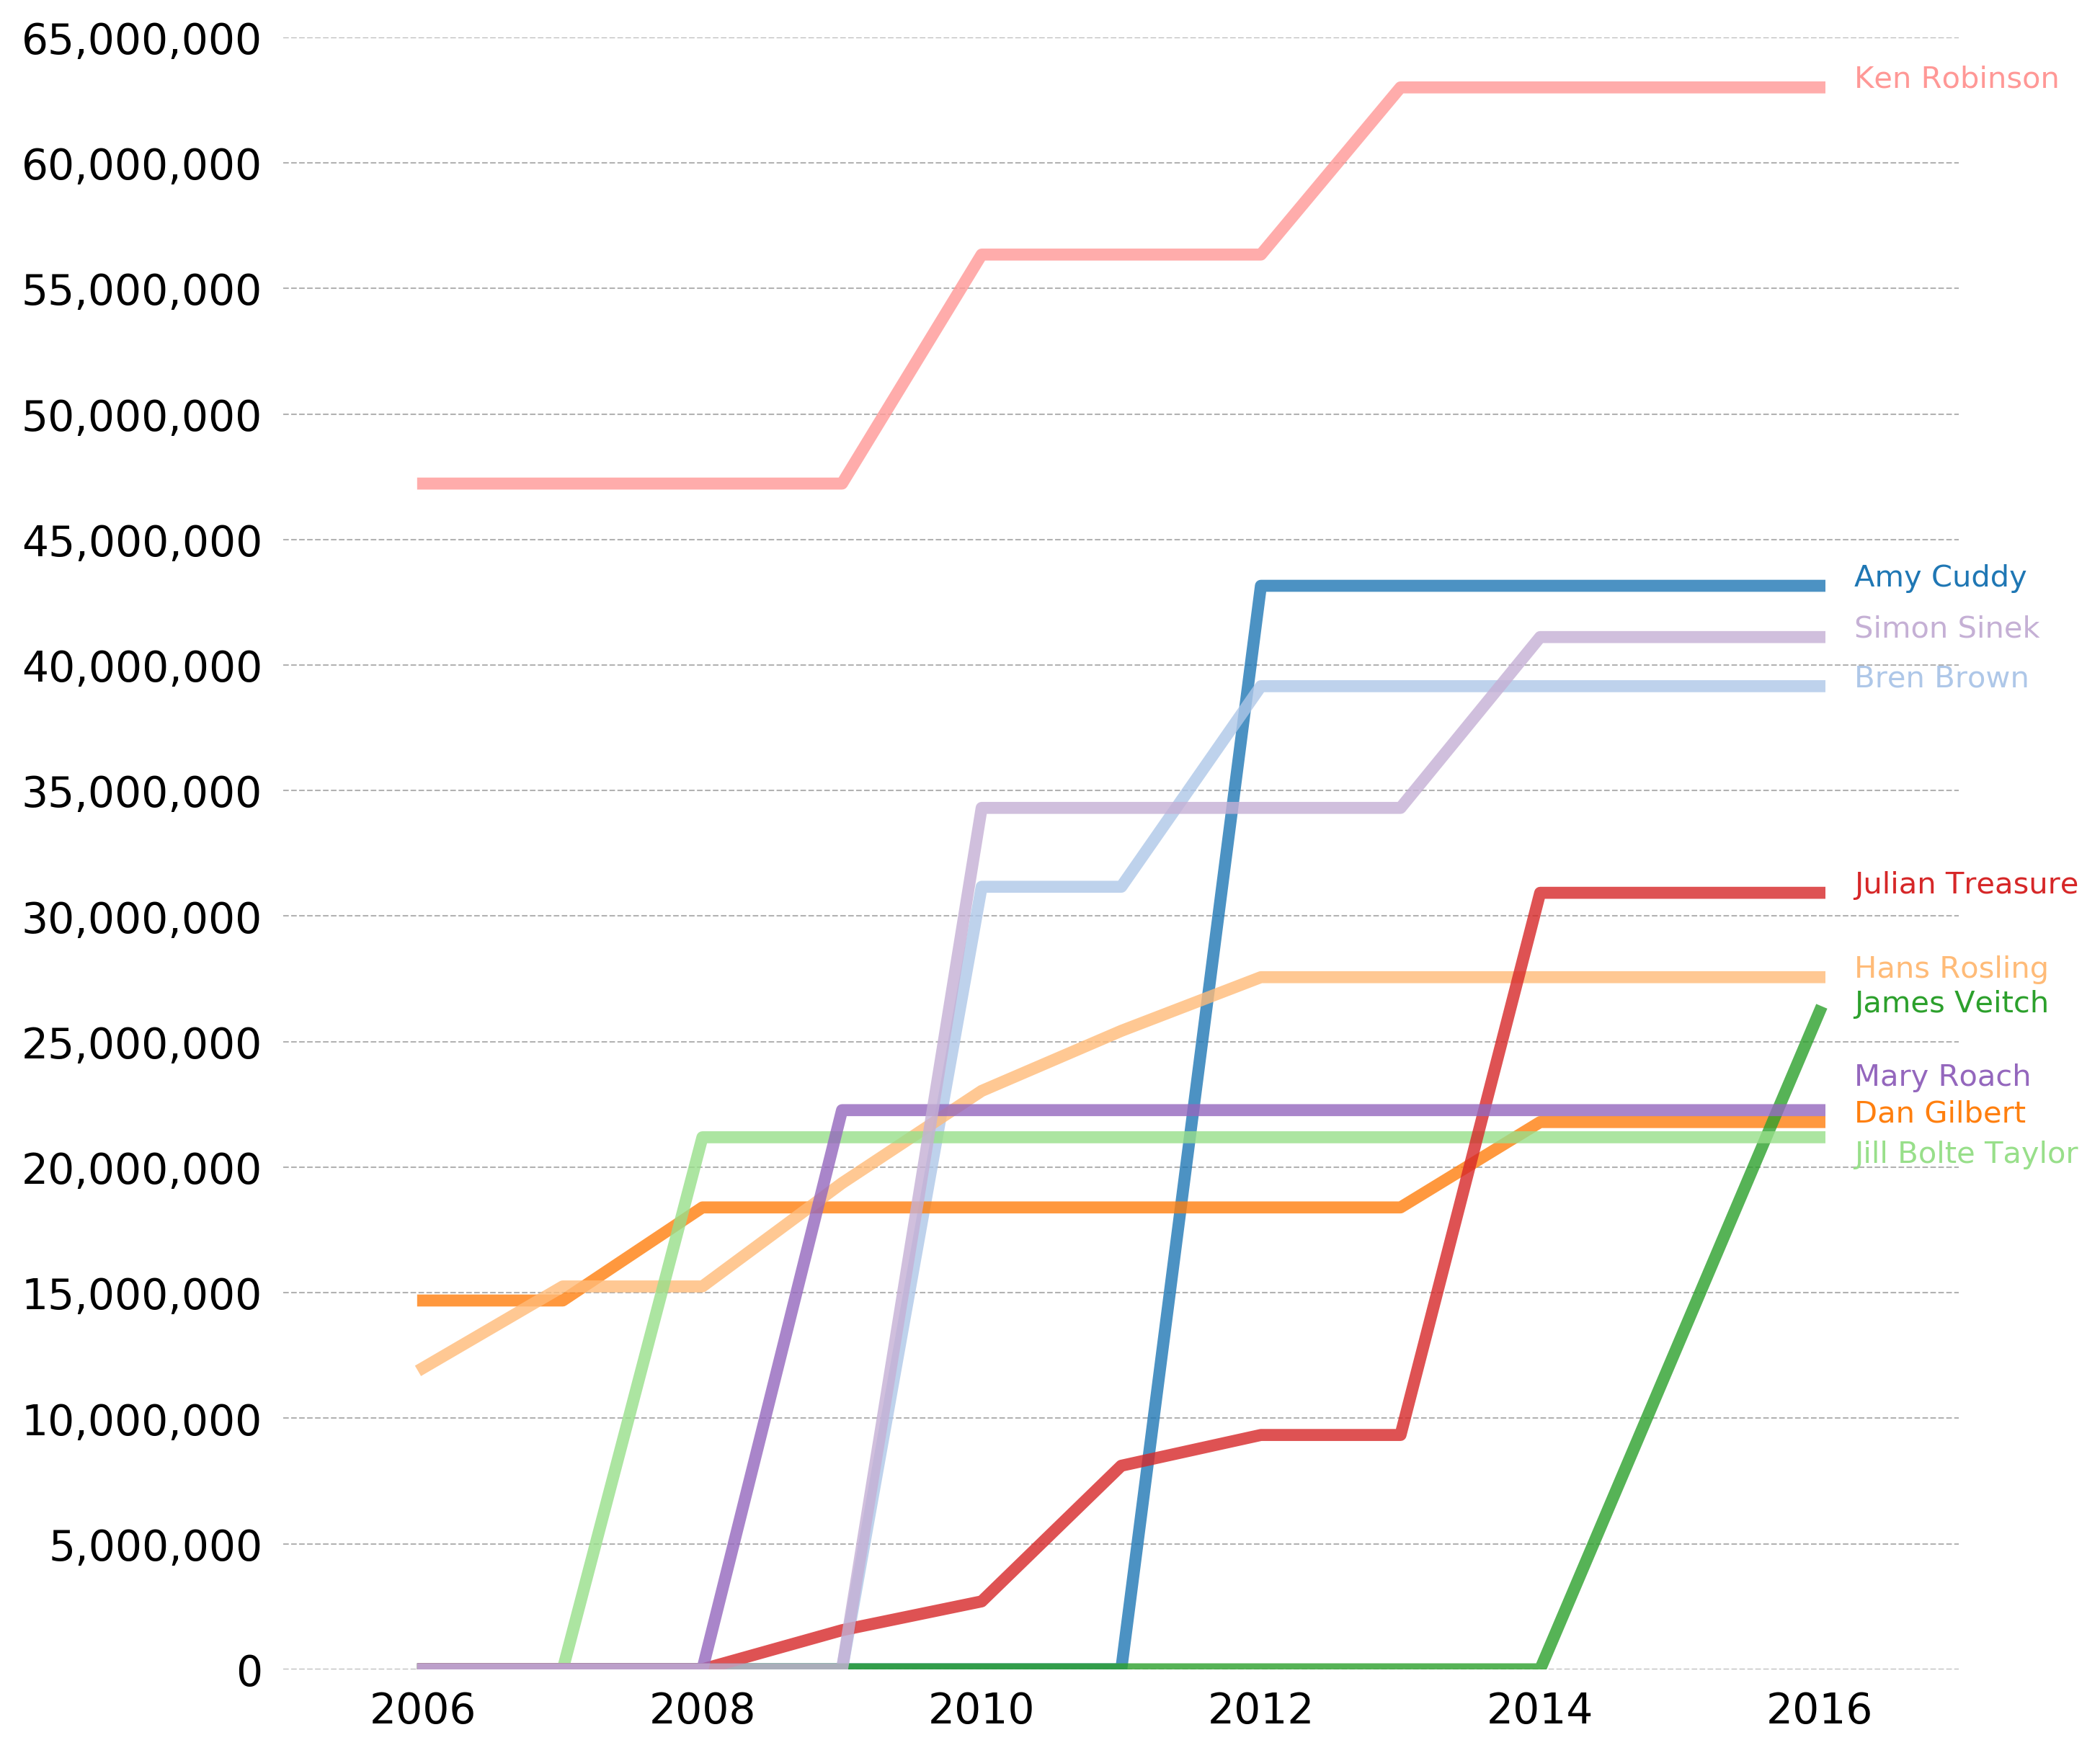

In [41]:
## make a cumulative graph
## have to input for every column

# These are the "Tableau 10" colors as RGB.    
tableau10 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213)]    
  
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)   
    
    
plt.figure(figsize=(10, 10),dpi=my_dpi)
ax = plt.subplot(111)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
     
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
   
plt.ylim(0, 65000000)    
plt.xlim(2005, 2017.5)   

plt.yticks(range(0, 70000000, 5000000), [format(x, ',') for x in range(0, 70000000, 5000000)], fontsize=14)  
plt.xticks(fontsize=14)    
      
for y in range(0, 70000000, 5000000):    
    plt.plot(range(2005, 2018), [y] * len(range(2005, 2018)), "--", lw=0.5, color="black", alpha=0.3)    
    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

ax.xaxis.set_label_text('year')
ax.xaxis.label.set_visible(False)

## start inputting lines
for i in range(len(speakers)):
    speakers_year.plot(x=speakers_year.year, y=col[i+1], ax = ax, legend = False, lw=4, alpha = 0.8, color = tableau10[i])


    
#for i in range(10):
#    ax.text(num_view[i]-9000000, i+0.1, num_view[i], fontsize = 15, color='white')

## the total views of speakers
nn = ['2016']
nitty = speakers_year[speakers_year['year'].isin(nn)]
nitty = nitty.values.tolist()
nitty = nitty[0]
nitty = nitty[1:]
    
for i in range(10):
    if speakers[i] == 'Amy Cuddy':
        ax.text(2016.25, nitty[i], 'Amy Cuddy', color = tableau10[i])
    elif speakers[i] == 'Bren Brown':
        ax.text(2016.25, nitty[i], 'Bren Brown', color = tableau10[i])    
    elif speakers[i] == 'Dan Gilbert':
        ax.text(2016.25, nitty[i], 'Dan Gilbert', color = tableau10[i]) 
    elif speakers[i] == 'Hans Rosling':
        ax.text(2016.25, nitty[i], 'Hans Rosling', color = tableau10[i]) 
    elif speakers[i] == 'James Veitch':
        ax.text(2016.25, nitty[i], 'James Veitch', color = tableau10[i]) 
    elif speakers[i] == 'Jill Bolte Taylor':
        ax.text(2016.25, nitty[i]-1000000, 'Jill Bolte Taylor', color = tableau10[i]) 
    elif speakers[i] == 'Julian Treasure':
        ax.text(2016.25, nitty[i], 'Julian Treasure', color = tableau10[i]) 
    elif speakers[i] == 'Ken Robinson':
        ax.text(2016.25, nitty[i], 'Ken Robinson', color = tableau10[i])   
    elif speakers[i] == 'Mary Roach':
        ax.text(2016.25, nitty[i] + 1000000, 'Mary Roach', color = tableau10[i])   
    elif speakers[i] == 'Simon Sinek':
        ax.text(2016.25, nitty[i], 'Simon Sinek', color = tableau10[i])   

plt.savefig('cumulative speaker.png')

## Tags

In [24]:
## extract the tags from the tag column. separate year
## 2006~2010, 2011~2014, 2015~2017
year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
year1 = year[:5]
year2 = year[5:9]
year3 = year[9:]

In [25]:
## make the tags values into list.
ted1 = ted['tags'].str.replace("'", '')
ted1 = ted1.str.replace("[", '')
ted1 = ted1.str.replace("]", '')
ted1 = ted1.str.replace(" ", '')
ted1 = ted1.str.replace('"', '')
ted1 = ted1.str.split(',')

## into ted dataframe
ted['new'] = ted1
ted.new[0][1]

'creativity'

In [26]:
## into each year categories
tags1 = ted['new'][ted['year'].isin(year1)].reset_index(drop = True)
tags2 = ted['new'][ted['year'].isin(year2)].reset_index(drop = True)
tags3 = ted['new'][ted['year'].isin(year3)].reset_index(drop = True)

In [27]:
a = []
for i in range(len(tags1)):
    for x in range(len(tags1[i])):
        a.append(tags1[i][x])
taggs1 = pd.DataFrame(a)
taggs1= taggs1.groupby([0]).size()

a1 = []
for i in range(len(tags2)):
    for x in range(len(tags2[i])):
        a1.append(tags2[i][x])
taggs2 = pd.DataFrame(a1)
taggs2= taggs2.groupby([0]).size()

a2 = []
for i in range(len(tags3)):
    for x in range(len(tags3[i])):
        a2.append(tags3[i][x])
taggs3 = pd.DataFrame(a2)
taggs3= taggs3.groupby([0]).size()

In [28]:
## get top n tags. maybe 3?
taggs3 = taggs3.sort_values(ascending= False).head(10)
taggs2 = taggs2.sort_values(ascending= False).head(10)
taggs1 = taggs1.sort_values(ascending= False).head(10)
print(taggs1,'\n', taggs2,'\n', taggs3)

0
technology       289
culture          220
science          213
globalissues     208
design           200
entertainment    168
business         163
art               76
music             72
performance       66
dtype: int64 
 0
technology       276
TEDx             271
culture          228
science          217
globalissues     198
design           137
business         121
entertainment    105
health            86
biology           85
dtype: int64 
 0
society          184
technology       162
humanity         144
innovation       138
TEDx             137
science          137
socialchange     134
communication    133
future           122
community         99
dtype: int64


In [30]:
## tags to excel

#taggs1.to_csv("tags1.csv")
#taggs2.to_csv("tags2.csv")
#taggs3.to_csv("tags3.csv")

## top3 tags are

#technology    289
#culture       220
#science       213

#technology    276
#TEDx          271
#culture       228

#society       184
#technology    162
#humanity      144


In [38]:
## get top 10 talks that contain tags

taggs3 = taggs3.sort_values(ascending= False).head(3)
taggs2 = taggs2.sort_values(ascending= False).head(3)
taggs1 = taggs1.sort_values(ascending= False).head(3)

## to list
tagggs1 = list(taggs1.index)
tagggs2 = list(taggs2.index)
tagggs3 = list(taggs3.index)

## separate ted
ted1 = ted[ted['year'].isin(year1)].reset_index(drop= True)
ted2 = ted[ted['year'].isin(year2)].reset_index(drop= True)
ted3 = ted[ted['year'].isin(year3)].reset_index(drop= True)

## sort talks with the tags
b1= []
for i in range(len(ted1)):
    for x in range(len(ted1['new'][i])):
        if ted1['new'][i][x] in tagggs1:
            b1.append(ted1['name'][i])
b1 = set(b1)
ted1 = ted1[ted1['name'].isin(b1)].sort_values(by = 'views', ascending = False).head(10)
ted1 = ted1['name'].reset_index(drop = True)

b2= []
for i in range(len(ted2)):
    for x in range(len(ted2['new'][i])):
        if ted2['new'][i][x] in tagggs2:
            b2.append(ted2['name'][i])
b2 = set(b2)
ted2 = ted2[ted2['name'].isin(b2)].sort_values(by = 'views', ascending = False).head(10)
ted2 = ted2['name'].reset_index(drop=True)

b3= []
for i in range(len(ted3)):
    for x in range(len(ted3['new'][i])):
        if ted3['new'][i][x] in tagggs3:
            b3.append(ted3['name'][i])
b3 = set(b3)
ted3 = ted3[ted3['name'].isin(b3)].sort_values(by = 'views', ascending = False).head(10)
ted3 = ted3['name'].reset_index(drop = True)

In [39]:
print(ted1, ted2, ted3)

0            Ken Robinson: Do schools kill creativity?
1              Brené Brown: The power of vulnerability
2    Mary Roach: 10 things you didn't know about or...
3              Jill Bolte Taylor: My stroke of insight
4                   Tony Robbins: Why we do what we do
5                   Dan Pink: The puzzle of motivation
6    Pranav Mistry: The thrilling potential of Sixt...
7     Dan Gilbert: The surprising science of happiness
8                David Gallo: Underwater astonishments
9    Chimamanda Ngozi Adichie: The danger of a sing...
Name: name, dtype: object 0    Julian Treasure: How to speak so that people w...
1    Cameron Russell: Looks aren't everything. Beli...
2                  Susan Cain: The power of introverts
3                     Pamela Meyer: How to spot a liar
4         Shawn Achor: The happy secret to better work
5    Esther Perel: The secret to desire in a long-t...
6    Raffaello D'Andrea: The astounding athletic po...
7    Jon Ronson: Strange answers to the